<a href="https://colab.research.google.com/github/FtkXiaoguo/myPyLib/blob/main/TestMyImgDataSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt

In [1]:
from pathlib import Path

from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image


class ImageFolder(Dataset):
    IMG_EXTENSIONS = [".jpg", ".jpeg", ".png", ".bmp"]

    def __init__(self, img_dir, transform=None):
        # 画像ファイルのパス一覧を取得する。
        self.img_paths = self._get_img_paths(img_dir)
        self.transform = transform

    def __getitem__(self, index):
        path = self.img_paths[index]
        # 画像を読み込む。
        img = Image.open(path)

        if self.transform is not None:
            # 前処理がある場合は行う。
            img = self.transform(img)

        return img

    def _get_img_paths(self, img_dir):
        """指定したディレクトリ内の画像ファイルのパス一覧を取得する。
        """
        img_dir = Path(img_dir)
        img_paths = [
            p for p in img_dir.iterdir() if p.suffix in ImageFolder.IMG_EXTENSIONS
        ]

        return img_paths

    def __len__(self):
        """ディレクトリ内の画像ファイルの数を返す。
        """
        return len(self.img_paths)

     

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/kkData'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


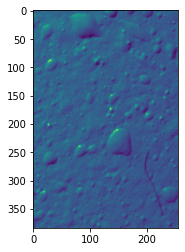

In [12]:
# Transform を作成する。
transform = transforms.Compose([transforms.Resize(256), transforms.ToTensor()])
# Dataset を作成する。
dataset = ImageFolder(data_dir+'/AnoData', transform)
# DataLoader を作成する。
dataloader = DataLoader(dataset, batch_size=1)

for batch in dataloader:
    plt.imshow(batch[0][0])

In [25]:
batch_iterator = iter(dataloader)  # イテレータに変換


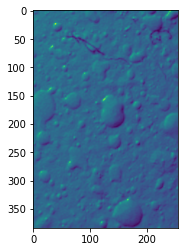

In [29]:
imges = next(batch_iterator)  # 1番目の要素を取り出す
plt.imshow(imges[0][0])